In [14]:
import pystan
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

In [1]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [4]:
sm = pystan.StanModel(model_code=schools_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


In [5]:
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

In [6]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

In [7]:
## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [9]:
print(fit)

Inference for Stan model: anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.64    0.22   5.45  -4.03   4.33   7.63  10.86  18.92    632   1.01
tau        7.23    0.22   5.88   0.31    2.9   5.85  10.29  23.22    722    1.0
eta[0]     0.42    0.02   0.91  -1.42  -0.21   0.46   1.04   2.09   1727    1.0
eta[1]     0.02    0.02   0.86   -1.7  -0.55   0.03   0.59    1.7   2000    1.0
eta[2]    -0.18    0.02   0.89  -1.92  -0.78  -0.19   0.42   1.62   2000    1.0
eta[3]    -0.03    0.02   0.84  -1.62  -0.59  -0.05   0.53    1.7   2000    1.0
eta[4]    -0.34    0.02   0.85   -2.0   -0.9  -0.35    0.2   1.46   1892    1.0
eta[5]    -0.22    0.02   0.84  -1.95  -0.76  -0.22   0.33   1.46   2000    1.0
eta[6]     0.39    0.02   0.89  -1.44  -0.17   0.37   0.96    2.2   2000    1.0
eta[7]      0

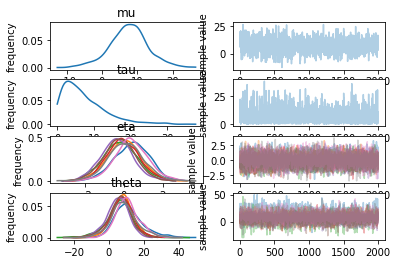

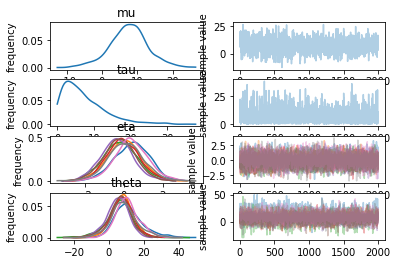

In [19]:
fit.plot()
# plt.tight_layout()